## Naive Bayes Algorithm

### Step 1. Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Import the Datasets

In [3]:
df=pd.read_csv("Heart _Attack.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Step 3: Splitting the Dataset into the Training Set and Test Set

In [53]:
x=df[['chol','thalach']].values
y=df.iloc[:,-1].values

In [54]:
x

array([[233, 150],
       [250, 187],
       [204, 172],
       [236, 178],
       [354, 163],
       [192, 148],
       [294, 153],
       [263, 173],
       [199, 162],
       [168, 174],
       [239, 160],
       [275, 139],
       [266, 171],
       [211, 144],
       [283, 162],
       [219, 158],
       [340, 172],
       [226, 114],
       [247, 171],
       [239, 151],
       [234, 161],
       [233, 179],
       [226, 178],
       [243, 137],
       [199, 178],
       [302, 162],
       [212, 157],
       [175, 123],
       [417, 157],
       [197, 152],
       [198, 168],
       [177, 140],
       [219, 188],
       [273, 152],
       [213, 125],
       [177, 160],
       [304, 170],
       [232, 165],
       [269, 148],
       [360, 151],
       [308, 142],
       [245, 180],
       [208, 148],
       [264, 143],
       [321, 182],
       [325, 172],
       [235, 180],
       [257, 156],
       [216, 115],
       [234, 160],
       [256, 149],
       [302, 151],
       [231,

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25, random_state=0)

### Step 4: Feature Scaling

In [69]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

### Step 5: Training the Naive Bayes model on the Training set - GAUSSIAN CLASSIFIER & BERNOULLI CLASSIFIER

In [75]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
gnb=GaussianNB()
bnb=BernoulliNB()
gnb.fit(x_train, y_train)
bnb.fit(x_train, y_train)

BernoulliNB()

### Step 6: Predicting a New Result

In [76]:
print(gnb.predict(sc.transform([[240,160]])))

[1]


In [77]:
print(bnb.predict(sc.transform([[240,160]])))

[1]


### Step 7: Predicting the Test Set Results

In [78]:
y_pred_1=gnb.predict(x_test)
y_pred_2=bnb.predict(x_test)

In [79]:
print(np.concatenate((y_pred_1.reshape(len(y_pred_1),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]]


In [80]:
print(np.concatenate((y_pred_2.reshape(len(y_pred_2),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]]


### Step 8: Making the Confusion Matrix

[[20 13]
 [ 7 36]]
accuracy_score :  0.7368421052631579
precision_score :  0.7346938775510204
recall_score :  0.8372093023255814
f1_score :  0.782608695652174


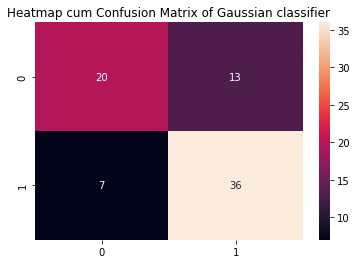

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score ,precision_score, recall_score, f1_score
import seaborn as sn
cm_1=confusion_matrix(y_test, y_pred_1)
print(cm_1)
sn.heatmap(cm_1,annot=True)
plt.title('Heatmap cum Confusion Matrix of Gaussian classifier')
ac_1=accuracy_score(y_test, y_pred_1)
pc_1=precision_score(y_test, y_pred_1)
rc_1=recall_score(y_test, y_pred_1)
fc_1=f1_score(y_test, y_pred_1)
print('accuracy_score : ', ac_1)
print('precision_score : ', pc_1)
print('recall_score : ', rc_1)
print('f1_score : ', fc_1)


[[22 11]
 [12 31]]


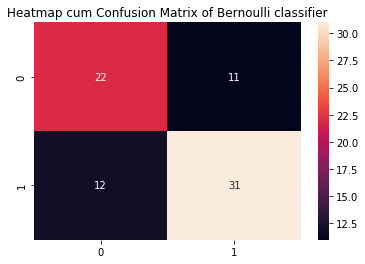

In [90]:
cm_2=confusion_matrix(y_test, y_pred_2)
print(cm_2)
sn.heatmap(cm_2,annot=True)
plt.title('Heatmap cum Confusion Matrix of Bernoulli classifier')
ac_2=accuracy_score(y_test, y_pred_2)
pc_2=precision_score(y_test, y_pred_2)
rc_2=recall_score(y_test, y_pred_2)
fc_2=f1_score(y_test, y_pred_2)

In [91]:
print('accuracy_score : ', ac_2)
print('precision_score : ', pc_2)
print('recall_score : ',  rc_2)
print('f1_score : ',  fc_2)

accuracy_score :  0.6973684210526315
precision_score :  0.7380952380952381
recall_score :  0.7209302325581395
f1_score :  0.7294117647058824


### Step 9: Visualising the Training Set Results- GAUSSIAN CLASSIFIER

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


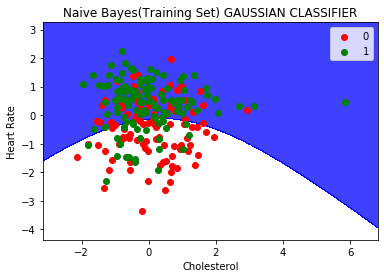

In [92]:
from matplotlib.colors import ListedColormap
x_set, y_set= x_train, y_train
x1,x2 = np.meshgrid(np.arange(start =x_set[:, 0].min() -1, stop=x_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =x_set[:, 1].min() -1, stop=x_set[:, 1].max()+1, step = 0.01))
plt.contourf(x1,x2, gnb.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),alpha=0.75, 
             cmap = ListedColormap(('white','blue')))
plt.xlim((x1.min(),x1.max()))
plt.ylim((x2.min(),x2.max()))
for i,j in enumerate(np.unique(y_set)):
     plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1], c= ListedColormap(('red','green'))(i) ,label= j)
plt.title('Naive Bayes(Training Set) GAUSSIAN CLASSIFIER')
plt.xlabel('Cholesterol')
plt.ylabel('Heart Rate')
plt.legend()
plt.show()

### Step 9b: Visualising the Training Set Results- BERNOULLI CLASSIFIER

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


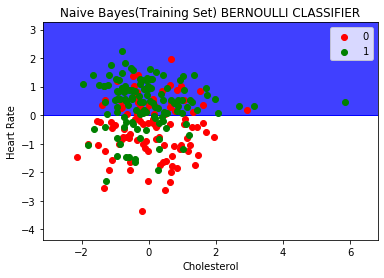

In [93]:
from matplotlib.colors import ListedColormap
x_set, y_set= x_train, y_train
x1,x2 = np.meshgrid(np.arange(start =x_set[:, 0].min() -1, stop=x_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =x_set[:, 1].min() -1, stop=x_set[:, 1].max()+1, step = 0.01))
plt.contourf(x1,x2, bnb.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),alpha=0.75, 
             cmap = ListedColormap(('white','blue')))
plt.xlim((x1.min(),x1.max()))
plt.ylim((x2.min(),x2.max()))
for i,j in enumerate(np.unique(y_set)):
     plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1], c= ListedColormap(('red','green'))(i) ,label= j)
plt.title('Naive Bayes(Training Set) BERNOULLI CLASSIFIER')
plt.xlabel('Cholesterol')
plt.ylabel('Heart Rate')
plt.legend()
plt.show()

### Step 10: Visualising the Test Set Results- GAUSSIAN CLASSIFIER

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


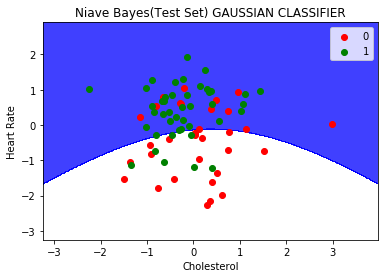

In [96]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, gnb.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Niave Bayes(Test Set) GAUSSIAN CLASSIFIER')
plt.xlabel('Cholesterol')
plt.ylabel('Heart Rate')
plt.legend()
plt.show()

### Step 10b: Visualising the Test Set Results- BERNOULLI CLASSIFIER

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


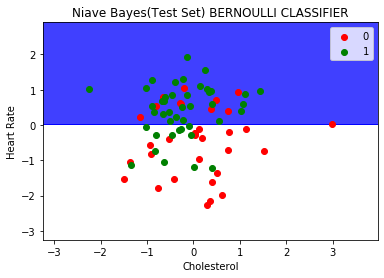

In [97]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, bnb.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Niave Bayes(Test Set) BERNOULLI CLASSIFIER')
plt.xlabel('Cholesterol')
plt.ylabel('Heart Rate')
plt.legend()
plt.show()